In [1]:
import numpy as np
import sys
sys.path.insert(0, 'C://Users//anton//Desktop//Documents//website//website')
from helper_funcs.utils import show_boxed_tensor_latex as show,print_matrix
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Warmup
    
To gain some intuition for what fractals are, we will begin with an example.

Consider the following equation:

\math f
where z is a complex number (i.e of the form  )

In [2]:
def f(z):
    return np.square(z) - 1

In [6]:
print(f(0))
print_matrix('f(z)',f([4, 1-0.2j, 1.6]))

-1


<IPython.core.display.Latex object>

Some values grow, some values shrink, some don’t experience much change.

To see the behaviour of the function on a larger scale, we can apply the function to a subset of the complex plane and plot the result. To create our subset (or mesh), we can make use of the meshgrid function.

In [7]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
mesh = x + (1j * y)  # Make mesh of complex plane

Now we will apply our function to each value contained in the mesh. 
Here we plot the absolute value (or modulus) of each element in the mesh after one “iteration” of the function using a 3D scatterplot:

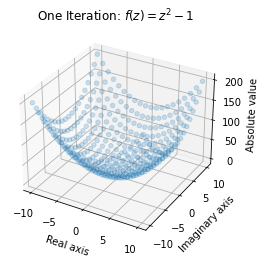

In [8]:
output = np.abs(f(mesh))  # Take the absolute value of the output (for plotting)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration: $ f(z) = z^2 - 1$');

This gives us a rough idea of what one iteration of the function does. Certain areas (notably in the areas closest to ) remain rather small while other areas grow quite considerably. Note that we lose information about the output by taking the absolute value, but it is the only way for us to be able to make a plot.

Let’s see what happens when we apply 2 iterations to the mesh:

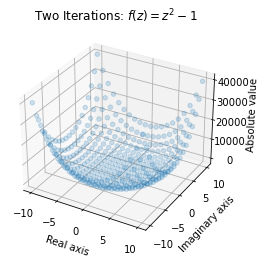

In [9]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

Once again, we see that values around the origin remain small, and values with a larger absolute value (or modulus) “explode”.

From first impression, its behaviour appears to be normal, and may even seem mundane. Fractals tend to have more to them then what meets the eye; the exotic behavior shows itself when we begin applying more iterations.

Given the shape of our first two plots, we would expect that these values would remain near the origin as we apply iterations to them. Let us see what happens when we apply 10 iterations to each value:

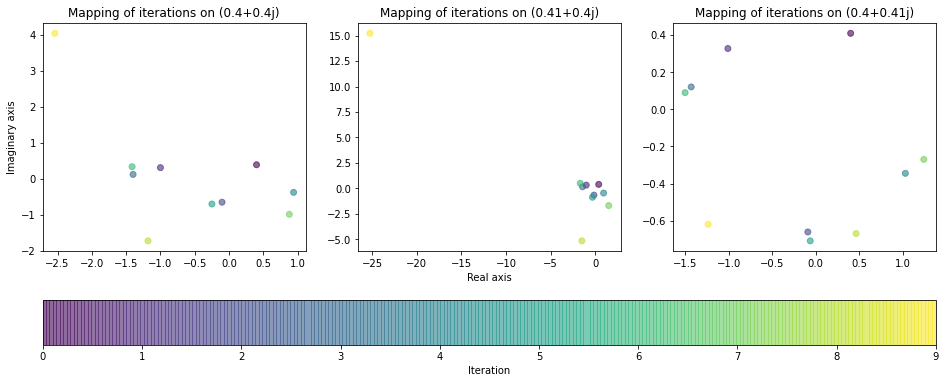

In [10]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros((num_iter+1, selected_values.shape[0]), dtype=complex)
outputs[0] = selected_values

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # Apply 10 iterations, save each output

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(data.real, data.imag, c=range(data.shape[0]), alpha=0.6)
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location="bottom", label='Iteration');

To our surprise, the behaviour of the function did not come close to matching our hypothesis. This is a prime example of the chaotic behaviour fractals possess. In the first two plots, the value “exploded” on the last iteration, jumping way beyond the region that it was contained in previously. The third plot on the other hand remained bounded to a small region close to the origin, yielding completely different behaviour despite the tiny change in value.

This leads us to an extremely important question: How many iterations can be applied to each value before they diverge (“explode”)?

As we saw from the first two plots, the further the values were from the origin, the faster they generally exploded. Although the behaviour is uncertain for smaller values (like z1,z2,z3), we can assume that if a value surpasses a certain distance from the origin (say 2) that it is doomed to diverge. We will call this threshold the radius.

This allows us to quantify the behaviour of the function for a particular value without having to perform as many computations. Once the radius is surpassed, we are allowed to stop iterating, which gives us a way of answering the question we posed. If we tally how many computations were applied before divergence, we gain insight into the behaviour of the function that would be hard to keep track of otherwise.

In [11]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape)  # Keep tally of the number of iterations

    # Iterate on element if and only if |element| < radius (Otherwise assume divergence)
    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        diverge_len[conv_mask] += 1
        z[conv_mask] = f(z[conv_mask])

    return diverge_len

we can go about plotting our first fractal! We will use the imshow function to create a colour-coded visualization of the tallies.

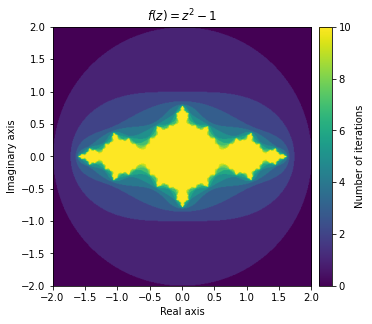

In [12]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2 -1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');

Closely related to the Julia set is the famous Mandelbrot set, which has a slightly different definition. Once again, we define 
 where  is a complex number, but this time our focus is on our choice of . We say that  is an element of the Mandelbrot set if f converges at . An equivalent definition is to say that  is an element of the Mandelbrot set if  can be iterated infinitely and not ‘explode’. We will tweak our Julia function slightly (and rename it appropriately) so that we can plot a visualization of the Mandelbrot set, which possesses an elegant fractal pattern.

In [13]:
def mandelbrot(mesh, num_iter=10, radius=2):

    c = mesh.copy()
    z = np.zeros(mesh.shape, dtype=np.complex128)
    diverge_len = np.zeros(z.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        z[conv_mask] = np.square(z[conv_mask]) + c[conv_mask]
        diverge_len[conv_mask] += 1

    return diverge_len

In [15]:
def plot_fractal(fractal, title='Fractal', figsize=(6, 6), cmap='rainbow', extent=[-2, 2, -2, 2]):

    plt.figure(figsize=figsize)
    ax = plt.axes()

    ax.set_title(f'${title}$')
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')

    im = ax.imshow(fractal, extent=extent, cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, label='Number of iterations')

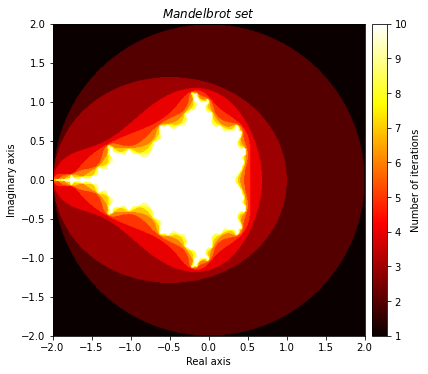

In [19]:
output = mandelbrot(mesh, num_iter=10)
kwargs = {'title': 'Mandelbrot \ set', 'cmap': 'hot'}

plot_fractal(output, **kwargs);

And generalizing to multiple iterations we get:

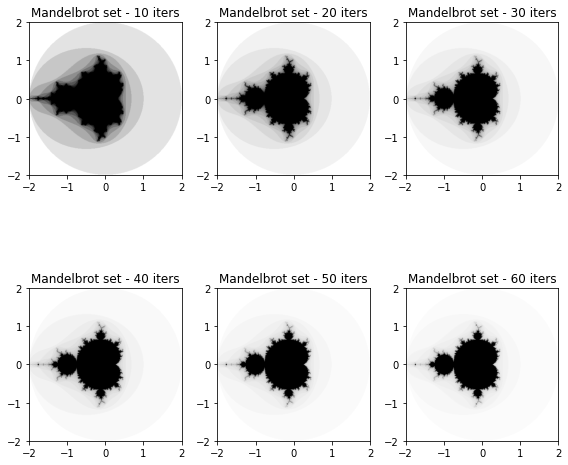

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
base_iter = 10

for deg, ax in enumerate(axes.ravel()):
    degree = base_iter + deg*10

    diverge_len = mandelbrot(mesh, num_iter=degree, radius=2)
    ax.imshow(diverge_len, extent=[-2, 2, -2, 2], cmap='binary')
    ax.set_title(f'Mandelbrot set - {degree} iters')

fig.tight_layout();